<a href="https://colab.research.google.com/github/sharan-88/sms_spam_detection/blob/main/sms_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd

In [28]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sms-spam-collection-dataset


In [29]:
import os

In [30]:
dir=[]
for i in os.listdir(path):
    dir.append(i)
print(dir)

['spam.csv']


In [31]:
direct_path = os.path.join(path,dir[0])
print(direct_path)

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [32]:
df  = pd.read_csv(direct_path,encoding='latin-1')

In [33]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


1. data cleaning
2.EDA
3.Text preprocessing
4.Model building
5.Model Evaluation
6.improvement
7.website
8.deployement

### step 01 : DATA CLEANING

In [34]:
df.shape

(5572, 5)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [36]:
df.dtypes

,0
v1,object
v2,object
Unnamed: 2,object
Unnamed: 3,object
Unnamed: 4,object


In [37]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [38]:
df_droped = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [39]:
df_droped.columns

Index(['v1', 'v2'], dtype='object')

In [40]:
df_droped.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [41]:
df_droped

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [42]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_droped['target'] = encoder.fit_transform(df_droped['target'])

In [43]:
df_droped.isnull().sum()

,0
target,0
text,0


In [44]:
df_droped.duplicated().sum()

df = df_droped.drop_duplicates(keep='first')
df.shape

(5169, 2)

In [45]:
# total number of spams and ham in data set
df['target'].value_counts()

,count
target,
0,4516
1,653


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

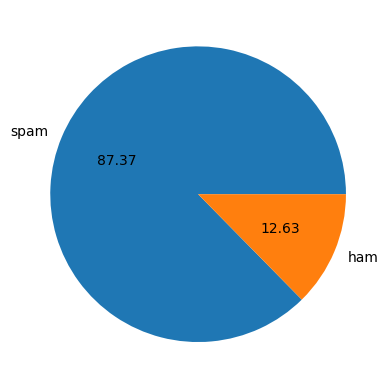

In [47]:
labels=["spam","ham"]
diagram01 = plt.pie(df['target'].value_counts(),labels=labels,autopct="%0.2f")
plt.show(diagram01)

Data is imbalanced

In [48]:
import nltk
!pip install nltk

In [49]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

to count the number of characters in a message

In [50]:
df["number_of_character"] = df["text"].apply(lambda x : len(x))

/tmp/ipython-input-2457602808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["number_of_character"] = df["text"].apply(lambda x : len(x))


In [51]:
df.columns

Index(['target', 'text', 'number_of_character'], dtype='object')

number of words

In [52]:
def count_words(x):
  x = x.strip()
  data =x.split(" ")
  return len(data)


In [53]:
count_words("hello we are here to help you")

7

In [59]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [62]:
# df["number_of_words"] = df["text"].apply(lambda x : count_words(x))
df["number_of_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

/tmp/ipython-input-554069406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["number_of_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))


In [61]:
df["number_of_sentence"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

/tmp/ipython-input-2605795736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["number_of_sentence"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))


In [63]:
df.head(4)
df.columns
df[['number_of_character', 'number_of_words',
       'number_of_sentence']].describe()

,number_of_character,number_of_words,number_of_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [64]:
# spam data info
df[df.target == 0][['number_of_character', 'number_of_words',
       'number_of_sentence']].describe()

,number_of_character,number_of_words,number_of_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [65]:
# ham data info
df[df.target == 1][['number_of_character', 'number_of_words',
       'number_of_sentence']].describe()

,number_of_character,number_of_words,number_of_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='number_of_character', ylabel='Count'>

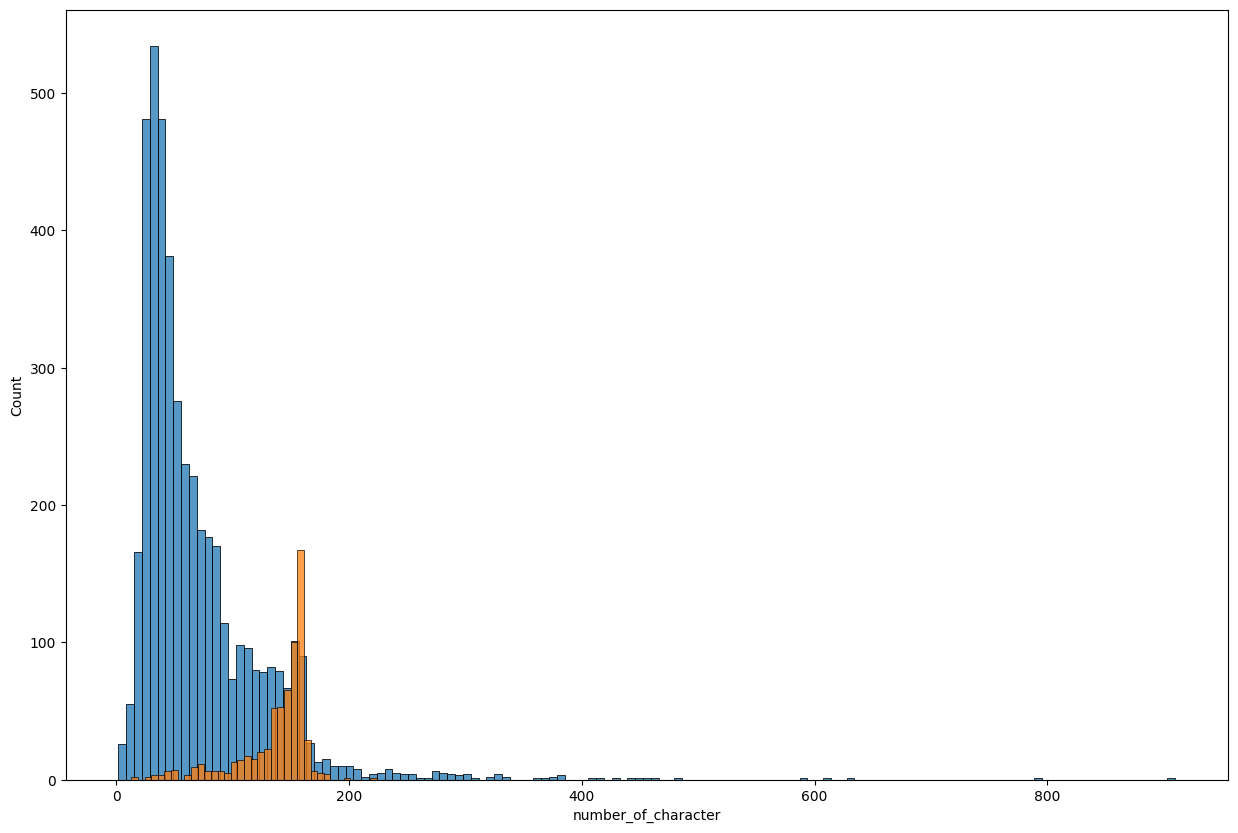

In [66]:
plt.figure(figsize=(15,10))
sns.histplot(df[df.target == 0]['number_of_character'])
sns.histplot(df[df.target == 1]['number_of_character'])

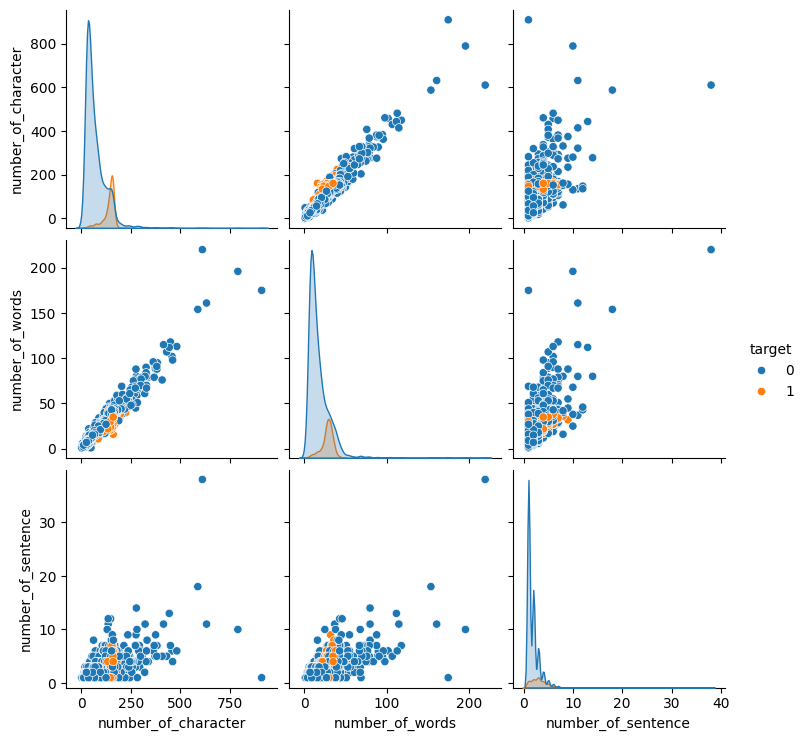

In [67]:
sns.pairplot(df,hue='target')

<Axes: >

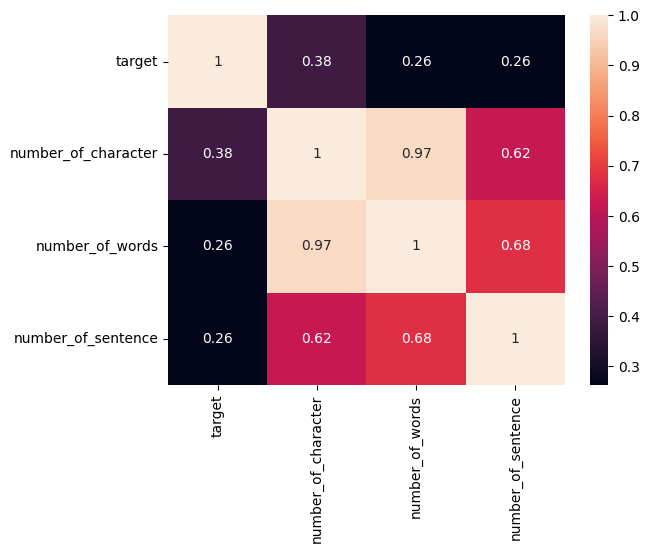

In [69]:
sns.heatmap(df.drop(columns=['text']).corr(),annot=True)

### step 03 : TEXT PREPROCESSING

In [ ]:
# # data preprocessing
# tokenization
# lower case
# removing special characters
# removing stop words and punctuation
# stemming

In [100]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Download necessary NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('PorterStemmer') # Although PorterStemmer is not a corpus, this line is harmless.

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
      #  stop words are those which does not have meaning when writen seperately like = is,are ,may etc
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading PorterStemmer: Package 'PorterStemmer' not
[nltk_data]     found in index


In [84]:
transform_text("did you like my presentation on ml ")

'like present ml'

In [86]:
df['transformed_text'] = df['text'].apply(transform_text)

/tmp/ipython-input-283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [87]:
df.head(10)

,target,text,number_of_character,number_of_words,number_of_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


 ## WORDCLOUD :
 A word cloud is a visualization tool  used during the pre-processing and exploratory phase of text data. It helps to quickly identify frequent words and get a feel for the themes in the dataset before applying natural language processing or classification models.

In [88]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [91]:
spam_wc = wc.generate(df[df['target']== 1]['transformed_text'].str.cat(sep=' '))

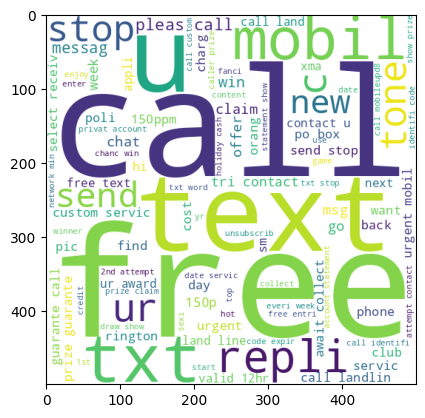

In [92]:
plt.imshow(spam_wc)

In [93]:
ham_wc = wc.generate(df[df["target"]== 0]['transformed_text'].str.cat(sep=' '))

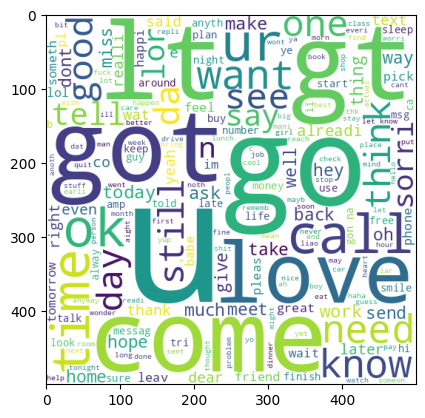

In [96]:
plt.imshow(ham_wc)

In [111]:
from collections import Counter
spam_corpus =[]
for mesg in df[df['target']== 1]['transformed_text'].tolist():
  for words in mesg.split():
    spam_corpus.append(words)

len(spam_corpus)
data = Counter(spam_corpus)
data = data.most_common(30)
data_words = [ i for i,j in data]
data_count = [j for i,j in data]

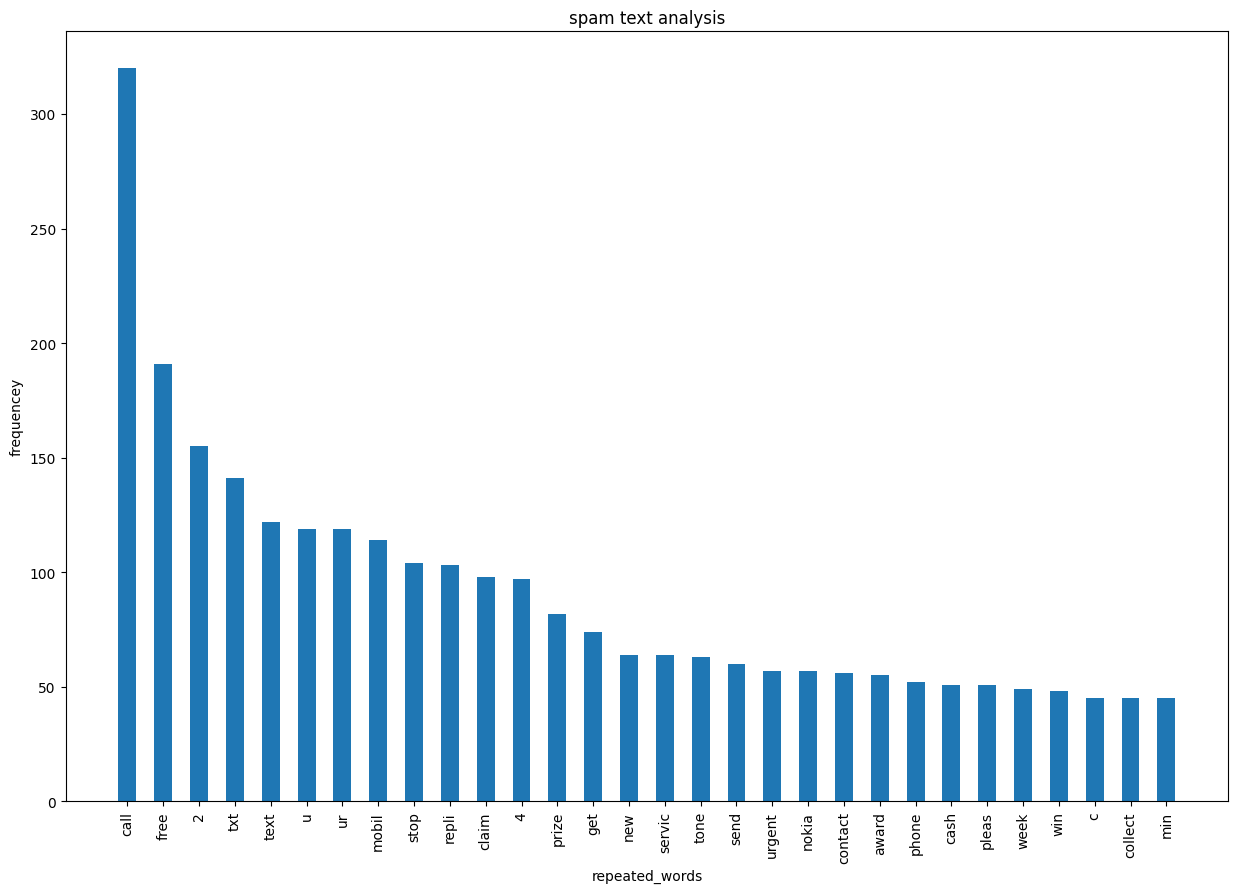

In [118]:
plt.figure(figsize=(15,10))
plt.bar(data_words,data_count,width=0.5)
plt.xlabel("repeated_words")
plt.ylabel("frequencey")
plt.title("spam text analysis")

# rotate x-axis labels
plt.xticks(rotation=90)

plt.show()

### MODEL BUILDING


In [119]:
df.head(5)

,target,text,number_of_character,number_of_words,number_of_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


text to words
1. bag of words - used in  this project
2. tiidf